#   What Database Management Software Tunisian Developers Use ?


### Introduction
Data Science, is a disciplinary blend of data inference, algorithm development, and technology aimed at solving complex analytical problems. At the heart of this great mix is data, the massive amounts of raw information are firstly stored in databases. Thus, in this project (i.e., Udacity Data Scientist Nanoodegree Program) I focused on exploring the use of databases in the Tunisian context. The exploration is based on data generated from Stackoverflow’s 2019 and 2020 Annual Developer Survey.
![title](image.PNG)
### Motivation
The key motivations behind this project are the following questions:
1) What are the most used and required databases in Tunisia?                                                            
2) Is there a correlation between the required and currently used databases in Tunisia?                                  
3) What are the most Databases Tunisian developers are willing to use?

### Step(1).  Data Understanding

In [23]:
# import libraries
import numpy as np
import pandas as pd
from collections import Counter
pd.pandas.set_option('display.max_columns', None)
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Datasets retriedved from Stackoverflow survey https://insights.stackoverflow.com/survey
# Loading datasets of survey 2019 and 2020
df_2019 = pd.read_csv('survey_results_2019.csv')
df_2020 = pd.read_csv('survey_results_2020.csv')

In [24]:
#Exploring the data of survey 2019
df_2019.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [25]:
#Exploring basic statistical details of survey 2019
df_2019.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64917.000000,48706.000000,48706.000000,48706.000000,48706.000000,48706.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,1.884177,6.080609,4.450553,7.563218,7.068101,5.765581,6.948196,5.615053,7.920746,6.865061,5.838625,3.035396,1.560588,3.849998,3.005112,3.548906,3.709541,4.224309,3.796572,3.015602,3.443338,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,1.880973,3.080841,2.808365,2.830099,2.638513,2.851319,2.746491,2.782918,2.765758,2.687617,2.706479,1.326079,0.906463,1.315095,1.160622,1.116461,2.071172,1.842500,2.082178,1.651321,1.983163,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,5.000000,9.000000,7.000000,6.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [26]:
#Exploring the data of survey 2020
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [6]:
df_2020.tail()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very important,NaN,NaN,Once a decade,NaN,NaN,NaN,NaN,Start a free trial,Amused,Stack Overflow (public Q&A for anyone who codes),Call a coworker or friend,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,NaN,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,NaN,NaN,NaN,NaN,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,NaN,DynamoDB;Elasticsearch;MongoDB;MySQL;PostgreSQL,Oracle,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript,HTML/CSS,Node.js,NaN,Github;Gitlab,Confluence;Jira;Slack;Microsoft Teams,NaN,NaN,NaN,NaN,NaN,Once a year,NaN,NaN,NaN,NaN,Start a free trial,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes),Call a coworker or friend;Visit Stack Overflow,Windows,NaN,NaN,Linux;Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN
64460,65112,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,MariaDB;Microsoft SQL Server,MariaDB;Microsoft SQL Server;MySQL;Oracle,NaN,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,NaN,NaN,NaN,NaN,NaN,C#;HTML/CSS;Java;JavaScript;SQL,C#;HTML/CSS;Java;JavaScript;SQL,.NET Core;Xamarin,.NET;.NET Core,Github;Microsoft Teams,Github,NaN,NaN,Critically important,NaN,NaN,Once a year,NaN,NaN,NaN,NaN,Start a free trial;Ask developers I know/work ...,Indifferent,NaN,Meditate;Visit Stack Overflow;Go for a walk or...,Windows,NaN,Arduino;Linux;Raspberry Pi;Windows,Android;Arduino;Linux;Raspberry Pi;Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN


In [27]:
#Exploring basic statistical details of survey 2020
df_2020.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


### Step(2). Focusing on Tunisia 

In [28]:
# General exploration of how many developers from Tunisia partiticipated in the survey
Tunisia_19 = df_2019[(df_2019.Country == 'Tunisia')]
Tunisia_20 = df_2020[(df_2020.Country == 'Tunisia')]
print(Tunisia_19.shape)
print(Tunisia_20.shape)

(163, 129)
(125, 61)


In [30]:
# Data Understanding
def display_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

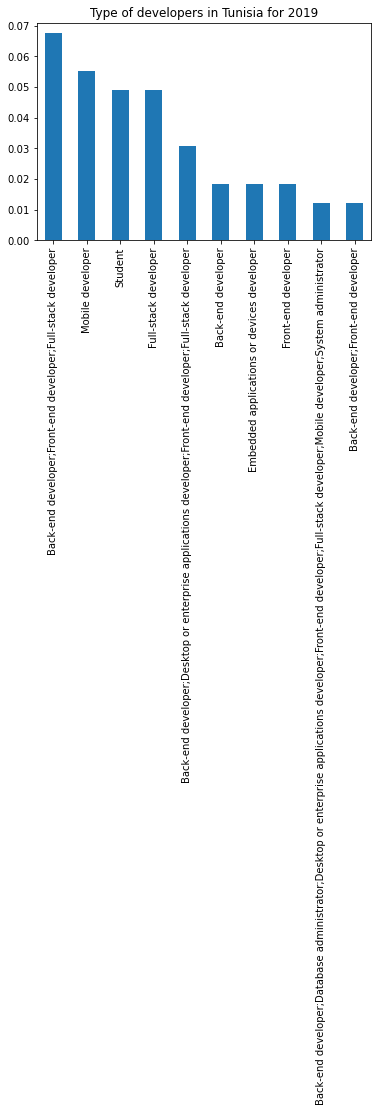

In [31]:
#Provide a pandas series of the counts for each type of developers for 2019
display_bar_chart(Tunisia_19, "DevType", "Type of developers in Tunisia for 2019")

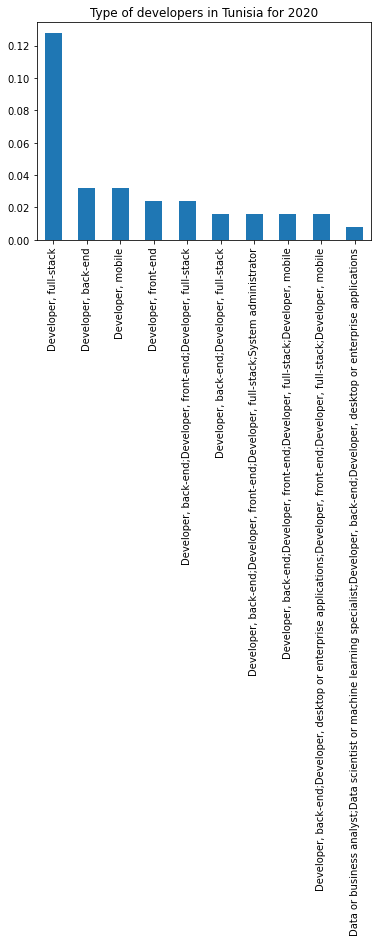

In [32]:
#Provide a pandas series of the counts for each type of developers for 2020
display_bar_chart(Tunisia_20, "DevType", "Type of developers in Tunisia for 2020")

### Step(3). Question1: What are the most used and required databases in Tunisia?

In [33]:
#Create copy of dataframe
def filter_country(df, column_filter, country, columns): 
    '''
    Filter a dataframe by country(i.e. why i use dropna to drop all other country excpet India)
    Returns filtred dataframe
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

#Filter the dataframe to focus on country Tunisia
df_tunisia19 = filter_country(df_2019, 'Country', 'Tunisia', ['DatabaseWorkedWith', 'DatabaseDesireNextYear'])
df_tunisia20 = filter_country(df_2020, 'Country', 'Tunisia', ['DatabaseWorkedWith', 'DatabaseDesireNextYear'])

In [34]:
#Split the columns
def split_column(df, column):
    '''
    Split column by ;,
    Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

# Splitting the dataframe to extract the database currently work with
Work_DB_tunisia19 = split_column(df_tunisia19, 'DatabaseWorkedWith')
Work_DB_tunisia20 = split_column(df_tunisia20, 'DatabaseWorkedWith')
# Splitting the dataframe to extract the desired database to work with
Desir_DB_tunisia19 = split_column(df_tunisia19, 'DatabaseDesireNextYear')
Desir_DB_tunisia20 = split_column(df_tunisia20, 'DatabaseDesireNextYear')

In [36]:
#flattening nested list
def flat(array_list):
    '''
    Flat a nested list,
    Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

#flattening nested list objects.
list_worked_DB_TN19 = flat(Work_DB_tunisia19)
list_worked_DB_TN20 = flat(Work_DB_tunisia20)

list_Desir_DB_TN19 = flat(Desir_DB_tunisia19)
list_worked_DB_TN20 = flat(Desir_DB_tunisia20)

In [13]:
# Group list to a dictionary 
def list_of_group(data_list, year):
    '''
    Group by count to a list,
    Returns result a dictionary
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Databases':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    return grouped_dict


dict_workDB_TN19 = list_of_group(list_worked_DB_TN19, '2019')
dict_workDB_TN20 = list_of_group(list_worked_DB_TN20, '2020')

dict_desirDB_TN19 = list_of_group(list_Desir_DB_TN19, '2019')
dict_desirDB_TN20 = list_of_group(list_worked_DB_TN20, '2020')

In [37]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
def create_dataframe(data_dicts): 
    '''
    Create two dataframes and append them,
    Returns a appended dataframe.
    '''
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = df1.append(df2)
    return df

DB_work_TN = create_dataframe([dict_workDB_TN19, dict_workDB_TN20])
DB_desir_TN = create_dataframe([dict_desirDB_TN19, dict_desirDB_TN20])

In [38]:
#Calculate percentage of used and required databases
def percentage(df, column):
    '''
    Scale data,
    Returns data scaled.
    '''
    df_copy = df
    series = []
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                        df_copy[df_copy[column] == val]['Count'].sum())
    
    joined = pd.Series()
    for i_series in series:
        joined = joined.append(i_series)
        
    return joined

DB_work_TN['Percentage'] = percentage(DB_work_TN, 'Year')
DB_desir_TN['Percentage'] = percentage(DB_desir_TN, 'Year')

In [39]:
# Get the top 5 DB
top_10_work = DB_work_TN.sort_values(by=['Percentage'], ascending=False).head(10)['Databases'].unique()
top_10_desir = DB_desir_TN.sort_values(by=['Percentage'], ascending=False).head(10)['Databases'].unique()
worked_chart = DB_work_TN[DB_work_TN['Databases'].isin(top_10_work)]
desir_chart = DB_desir_TN[DB_desir_TN['Databases'].isin(top_10_desir)]

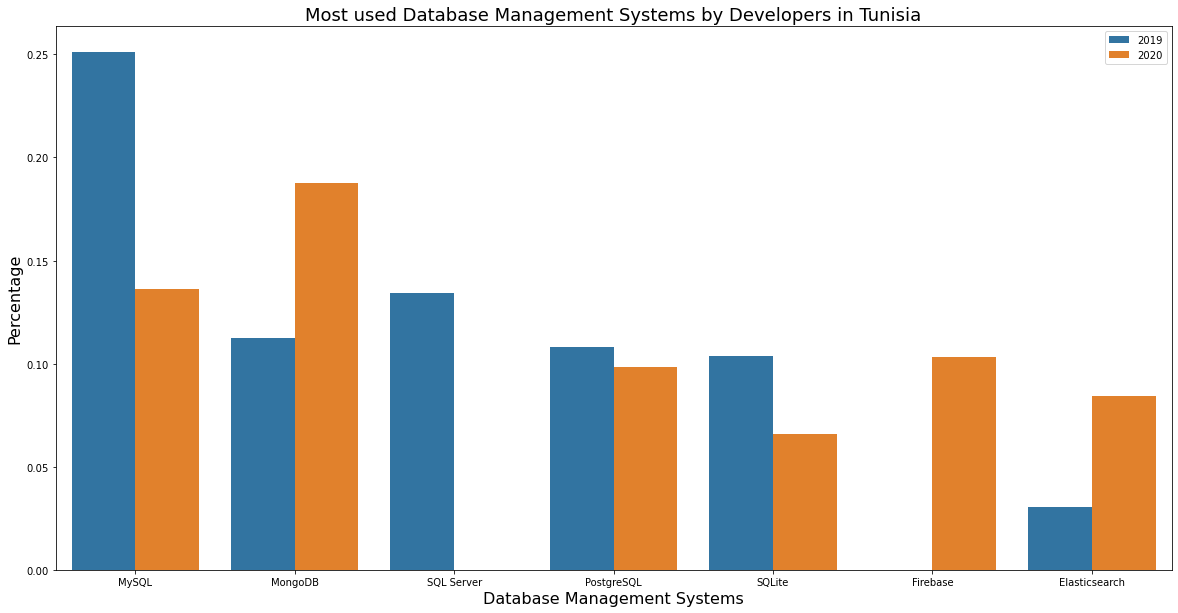

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Databases', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Database Management Systems", fontsize = 16)
plt.ylabel("Percentage", fontsize = 16)
plt.legend(title_fontsize='40')
plt.title('Most used Database Management Systems by Developers in Tunisia', size = 18)
plt.show()



### Results
As illustrated in the figure above, we can see that, in 2019, MySQL is the most used database in Tunisia with an average of 25%, followed by SQL server and PostgreSQL (respectively 14% and 12%). However, in 2020, the values changed with a decrease in the use of MySQL (14%). Tunisian developers tend to focus more on MongoDB with an average of 20%. Also the Firebase appeared in the market with an average of 10%.

### Step(4). Question 2: Is there a coorelation between the required and currently used databases in Tunisia?

In [41]:
# Create a new dataframe by grouping data

row = []
for j in list(zip(Work_DB_tunisia20, Desir_DB_tunisia20)):
    for i in j[0]:
        row.append({
            'Worked_DB': i, 
            'Desir_DB': Counter(j[0])
        })
        
DB_transition = pd.DataFrame(row).groupby('Worked_DB')\
                                            .agg({'Desir_DB': 'sum'}).reset_index()

In [42]:
# Create matrix
for row in DB_transition['Worked_DB']:
    DB_transition[row] = 0

for index, row in DB_transition.iterrows():
    total = sum([value for key, value in dict(row['Desir_DB']).items()])
    for key, value in dict(row['Desir_DB']).items():
         DB_transition[key].loc[index] = (value / total)

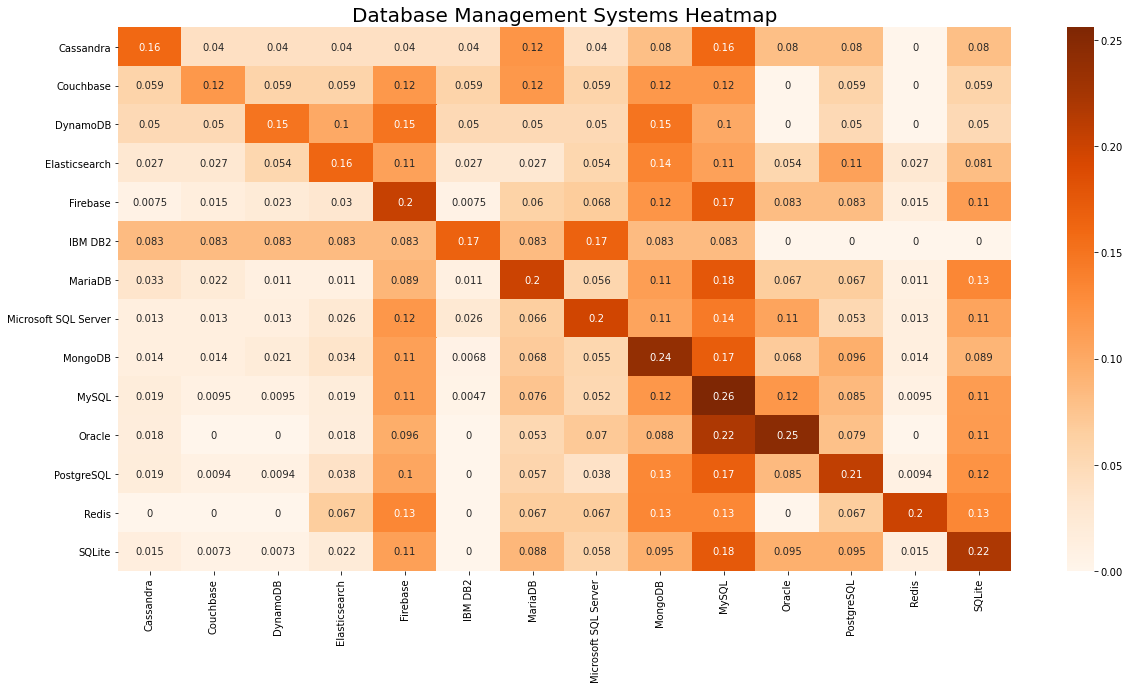

In [47]:
# Plot matrix
prlt = DB_transition.drop('Desir_DB', axis=1)\
                                        .set_index('Worked_DB')

plt.figure(figsize=(20, 10))
sns.heatmap(prlt, annot=True, cmap = "Oranges")
plt.title('Database Management Systems Heatmap', size = 20)
plt.ylabel('')
plt.show()

### Results
As illustrated in the figure above, the heatmap highlights a correlation between the used and required databases by Tunisian developers.

If we focus on MySQL, as the most required database in 2019, results reveal that it is correlated with databases from the same context (e.g., Oracle, SQLite, and PostgreSQL).

### Step(5). Question 3: What are the most Databases Tunisian developers are willing to use? 

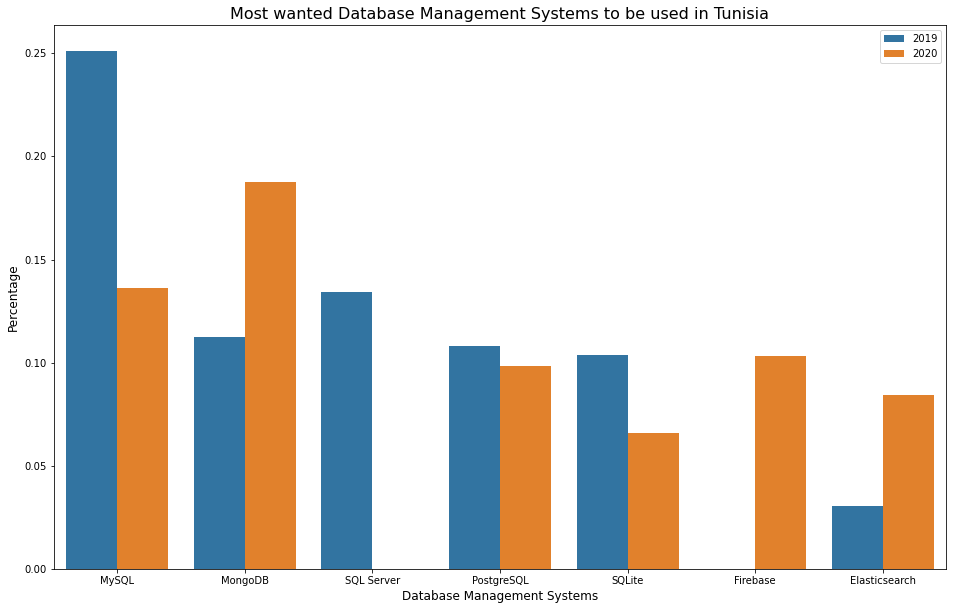

In [48]:
#Display findings
plt.figure(figsize=(16,10))
sns.barplot(x = 'Databases', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Database Management Systems to be used in Tunisia', size = 16)
plt.xlabel("Database Management Systems", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

### Results
The results highlight that Tunisian developers are focusing on using the most required databases in the market.

## Main Findings
Based on the exploration of data records, we have examined the use of databases in Tunisia(as a significant component in the field of data science). The results highlighted that: 
1) In 2019, most of the required databases is the mysql. But, within 2020, Firebase appeared as a new database.          
2) Tunisian developer tend to focus on databases from similar platfroms.                                                  
3) Tunisian developers are interested in exploring the newely required databases.                                          
To discover more please visit my medium blog click [here](https://chettaoui-neila.medium.com/what-database-management-systems-tunisian-developers-use-5118443c93d1)
#### References
The used data in this project is retrieved from [Stackoverfolow](https://insights.stackoverflow.com/survey)

This work is inspired [from](https://github.com/KiranUdacity/master_data/blob/master/Write%20a%20blog%20post/DataScience_blogpost.ipynb)